## FULL WORKING NOTEBOOK CODE

In [1]:
! pip install tensorflow matplotlib numpy


In [10]:
! pip uninstall numpy -y
! pip install "numpy<2"


Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Successfully uninstalled numpy-2.2.6


You can safely remove it manually.
You can safely remove it manually.


  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
manim 0.19.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
manim 0.19.1 requires numpy>=2.1; python_full_version >= "3.10", but you have numpy 1.26.4 which is incompatible.


In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam


TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

### Create time-series data

In [3]:
# Save folder
os.makedirs("gifs", exist_ok=True)

# Synthetic time series
np.random.seed(0)
t = np.arange(0, 200)
series = np.sin(0.1 * t) + 0.3 * np.random.randn(len(t))


### Prepare sequences

In [4]:
def create_sequences(data, window=20):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

WINDOW = 20
X, y = create_sequences(series, WINDOW)

X = X[..., np.newaxis]


### Build & train LSTM

In [5]:
model = Sequential([
    LSTM(32, input_shape=(WINDOW, 1)),
    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss="mse"
)

model.fit(X, y, epochs=25, verbose=0)


NameError: name 'Sequential' is not defined

### Generate rolling predictions

In [7]:
predictions = []

for i in range(WINDOW, len(series)):
    input_seq = series[i-WINDOW:i].reshape(1, WINDOW, 1)
    pred = model.predict(input_seq, verbose=0)[0, 0]
    predictions.append(pred)

predictions = np.array(predictions)


NameError: name 'model' is not defined

### Animation setup

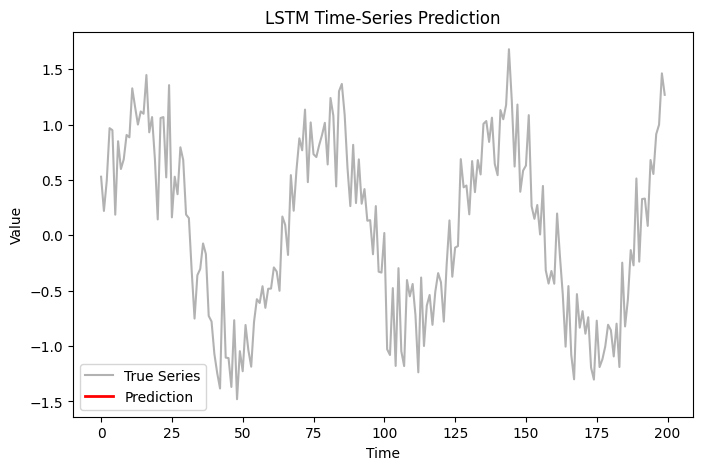

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.set_title("LSTM Time-Series Prediction")
ax.set_xlabel("Time")
ax.set_ylabel("Value")

line_true, = ax.plot(series, color="gray", alpha=0.6, label="True Series")
line_pred, = ax.plot([], [], color="red", linewidth=2, label="Prediction")

ax.legend()


### Create & save GIF

In [9]:
writer = PillowWriter(fps=3)

with writer.saving(fig, "gifs/lstm_time_series_prediction.gif", dpi=120):
    for i in range(len(predictions)):
        pred_x = np.arange(WINDOW, WINDOW + i + 1)
        pred_y = predictions[:i+1]

        line_pred.set_data(pred_x, pred_y)

        ax.set_xlim(0, len(series))
        ax.set_ylim(series.min() - 1, series.max() + 1)

        writer.grab_frame()

plt.show()


IndexError: list index out of range